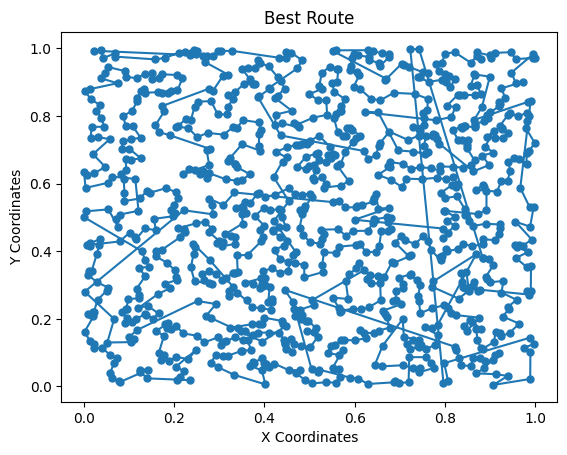

Best Route: [312, 218, 561, 558, 31, 619, 248, 624, 163, 293, 536, 913, 604, 400, 421, 518, 563, 499, 707, 13, 540, 962, 349, 401, 379, 427, 715, 572, 681, 980, 112, 589, 36, 870, 841, 275, 538, 37, 56, 473, 806, 12, 85, 321, 986, 735, 734, 277, 672, 811, 480, 509, 919, 166, 706, 383, 339, 763, 186, 545, 958, 14, 526, 912, 164, 313, 388, 173, 208, 641, 51, 711, 148, 32, 719, 371, 732, 569, 529, 720, 98, 566, 222, 504, 426, 153, 673, 30, 33, 969, 239, 422, 649, 363, 395, 245, 325, 183, 733, 617, 107, 760, 748, 390, 328, 89, 639, 237, 809, 181, 318, 553, 303, 991, 424, 849, 616, 869, 175, 154, 990, 988, 954, 406, 207, 292, 309, 575, 722, 0, 924, 118, 92, 702, 891, 664, 750, 906, 977, 903, 515, 605, 820, 832, 272, 522, 901, 169, 316, 692, 822, 124, 75, 2, 273, 430, 524, 982, 448, 968, 228, 940, 985, 145, 88, 694, 247, 779, 705, 858, 172, 63, 439, 812, 591, 114, 863, 944, 52, 960, 622, 27, 900, 168, 57, 885, 330, 902, 289, 818, 384, 189, 156, 505, 252, 266, 67, 997, 517, 608, 436, 833, 268

In [64]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Load your dataset of cities with their coordinates
def load_dataset(filename):
    data = np.loadtxt(filename, delimiter=',')
    return data
filename = "D:/MATERIALS/LEVEL 3/2/Evolutionary Algorithms/project/large.csv"
cities = load_dataset(filename)
num_cities = len(cities)

# Calculate Euclidean distance between two cities
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# Nearest neighbor algorithm for generating an initial route
def nearest_neighbor_initial_route():
    current_city = random.randint(0, num_cities - 1)  # Start from a random city
    unvisited_cities = set(range(num_cities))
    route = [current_city]
    unvisited_cities.remove(current_city)

    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: distance(cities[current_city], cities[city]))
        route.append(nearest_city)
        unvisited_cities.remove(nearest_city)
        current_city = nearest_city

    route.append(route[0])  # Return to the starting city
    return route
# Calculate the total distance of a route (including return to start)
def total_distance(route):
    total = 0
    for i in range(num_cities):
        total += distance(cities[route[i]], cities[route[i+1]])
    return total

# Simulated Annealing algorithm
def simulated_annealing(initial_route, initial_temp, cooling_rate, num_iterations):
    current_route = initial_route()
    best_route = current_route
    temp = initial_temp

    for i in range(num_iterations):
        new_route = current_route.copy()
        # Perform a random swap of two cities
        index1, index2 = random.sample(range(num_cities), 2)
        new_route[index1], new_route[index2] = new_route[index2], new_route[index1]

        current_energy = total_distance(current_route)
        new_energy = total_distance(new_route)

        # Acceptance probability
        if new_energy < current_energy or random.random() < math.exp((current_energy - new_energy) / temp):
            current_route = new_route

        # Update best route
        if total_distance(current_route) < total_distance(best_route):
            best_route = current_route

        # Cool the temperature
        temp *= cooling_rate

    return best_route

# Set initial parameters
initial_temp=3500
cooling_rate=0.99
num_iterations=30000

# Find the best route using Simulated Annealing with nearest neighbor initial route
best_route = simulated_annealing(nearest_neighbor_initial_route, initial_temp, cooling_rate, num_iterations)
best_distance = total_distance(best_route)

# Plot the best route
xs = [cities[i][0] for i in best_route]
ys = [cities[i][1] for i in best_route]

plt.plot(xs, ys, 'o-', markersize=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route')
plt.show()

print("Best Route:", best_route)
print("Best Distance:", best_distance)
#28.1

In [65]:

route_length = len(best_route)
print("Length of the route:", route_length)


Length of the route: 1001
